# Лабраторная работа №4

Выполнила: Иванова Елизавета Дмитриевна, НПМмд-01-23

# Импорт библиотек

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from tensorflow.keras import utils
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adadelta
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import os
from PIL import Image

# Задание 1

Используя шаблон ноутбука для распознавания видов одежды и аксессуаров из набора **fashion_mnist**, выполните следующие действия:

1. Создайте **9** моделей нейронной сети с различными архитектурами и сравните в них значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке.  Используйте следующее деление: обучающая выборка - **50000** примеров, проверочная выборка - **10000** примеров, тестовая выборка - **10000** примеров.

2. Заполните сравнительную таблицу в конце ноутбука, напишите свои выводы по результатам проведенных тестов.

## Описание базы

База: одежда, обувь и аксессуары
- Датасет состоит из набора изображений одежды, обуви, аксессуаров и их классов.
- Изображения одного вида хранятся в numpy-массиве **(28, 28)** - **x_train, x_test**.
- База содержит **10** классов: (Футболка, Брюки, Пуловер, Платье, Пальто, Сандалии/Босоножки, Рубашка, Кроссовки, Сумочка, Ботильоны) - **y_train, y_test**.
- Примеров: train - **60000**, test - **10000**.

## Вывод примеров

In [2]:
# Загрузка датасета
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Вывод размерностей выборок
print('Размер x_train:',x_train.shape)
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)

Размер x_train: (60000, 28, 28)
Размер y_train: (60000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)


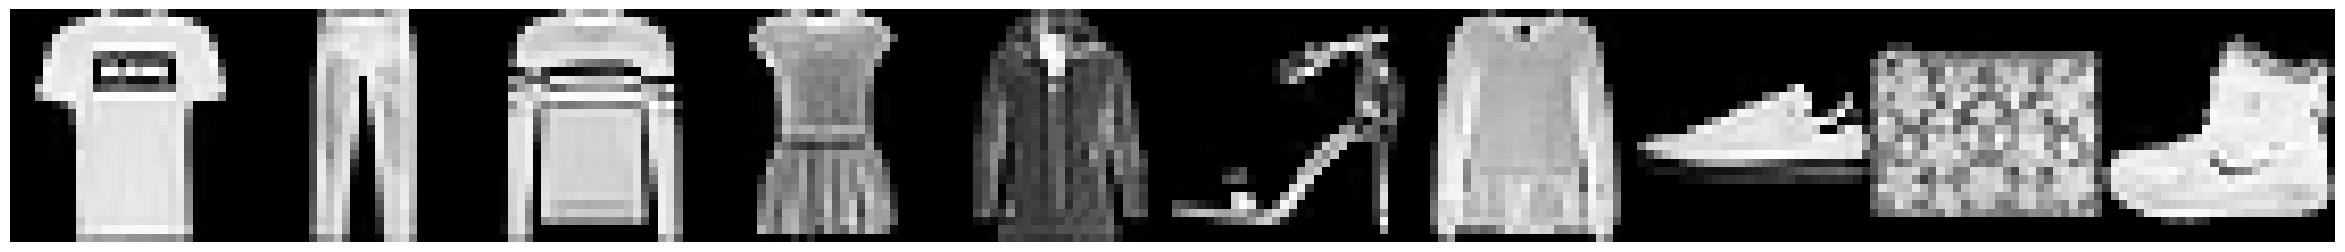

In [3]:
# Выбор 1 изображения каждого класса
imgs = np.array([x_train[y_train==i][0] for i in range(10)])

# Соединение изображения в одну линию
imgs = np.concatenate(imgs, axis=1)

# Создание поля для изображения
plt.figure(figsize=(30, 6))

# Отрисовка итогового изображения
plt.imshow(imgs, cmap='Greys_r')

# Без сетки
plt.grid(False)

# Без осей
plt.axis('off')

# Вывод результата
plt.show()

## Предобработка данных

In [4]:
# Нормализация изображений
x_train = x_train / 255.0
x_test = x_test / 255.0

# Перекодировка меток в one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Разделение данных на обучающую и проверочную выборки
# Из 60,000 примеров берем 50,000 для обучения и 10,000 для проверки
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=10000/60000, random_state=42)

# Вывод размерностей для проверки
print(f"Обучающая выборка: {x_train.shape[0]} примеров")
print(f"Проверочная выборка: {x_val.shape[0]} примеров")
print(f"Тестовая выборка: {x_test.shape[0]} примеров")

Обучающая выборка: 50000 примеров
Проверочная выборка: 10000 примеров
Тестовая выборка: 10000 примеров


### Модель 1: Полносвязная сеть (relu)

In [5]:
model_1 = Sequential([Flatten(),
                      Dense(128, input_shape=(784,), activation='relu'),
                      Dense(10, activation='softmax')])
model_1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128, verbose=2)
print(model_1.summary())

Epoch 1/10


/Users/iveeliz/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 - 1s - 1ms/step - accuracy: 0.8032 - loss: 0.5823 - val_accuracy: 0.8291 - val_loss: 0.4787
Epoch 2/10
391/391 - 0s - 759us/step - accuracy: 0.8535 - loss: 0.4185 - val_accuracy: 0.8571 - val_loss: 0.4102
Epoch 3/10
391/391 - 0s - 754us/step - accuracy: 0.8654 - loss: 0.3798 - val_accuracy: 0.8573 - val_loss: 0.3932
Epoch 4/10
391/391 - 0s - 747us/step - accuracy: 0.8761 - loss: 0.3492 - val_accuracy: 0.8637 - val_loss: 0.3805
Epoch 5/10
391/391 - 0s - 764us/step - accuracy: 0.8810 - loss: 0.3309 - val_accuracy: 0.8758 - val_loss: 0.3484
Epoch 6/10
391/391 - 0s - 783us/step - accuracy: 0.8872 - loss: 0.3124 - val_accuracy: 0.8797 - val_loss: 0.3419
Epoch 7/10
391/391 - 0s - 773us/step - accuracy: 0.8923 - loss: 0.2988 - val_accuracy: 0.8748 - val_loss: 0.3450
Epoch 8/10
391/391 - 0s - 795us/step - accuracy: 0.8939 - loss: 0.2909 - val_accuracy: 0.8800 - val_loss: 0.3383
Epoch 9/10
391/391 - 0s - 779us/step - accuracy: 0.9001 - loss: 0.2764 - val_accuracy: 0.8811 - val_loss: 0.3

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

None


### Модель 2: Полносвязная сеть (tanh)

In [6]:
model_2 = Sequential([Flatten(),
                      Dense(256, input_shape=(784,), activation='tanh'),
                      Dense(10, activation='softmax') ])
model_2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128, verbose=2)
print(model_2.summary())

Epoch 1/10
391/391 - 1s - 2ms/step - accuracy: 0.8161 - loss: 0.5232 - val_accuracy: 0.8466 - val_loss: 0.4259
Epoch 2/10
391/391 - 0s - 1ms/step - accuracy: 0.8582 - loss: 0.3974 - val_accuracy: 0.8608 - val_loss: 0.3775
Epoch 3/10
391/391 - 0s - 1ms/step - accuracy: 0.8699 - loss: 0.3603 - val_accuracy: 0.8667 - val_loss: 0.3592
Epoch 4/10
391/391 - 0s - 1ms/step - accuracy: 0.8781 - loss: 0.3362 - val_accuracy: 0.8698 - val_loss: 0.3560
Epoch 5/10
391/391 - 0s - 1ms/step - accuracy: 0.8844 - loss: 0.3157 - val_accuracy: 0.8727 - val_loss: 0.3495
Epoch 6/10
391/391 - 0s - 1ms/step - accuracy: 0.8891 - loss: 0.3026 - val_accuracy: 0.8735 - val_loss: 0.3452
Epoch 7/10
391/391 - 0s - 1ms/step - accuracy: 0.8946 - loss: 0.2868 - val_accuracy: 0.8815 - val_loss: 0.3208
Epoch 8/10
391/391 - 0s - 1ms/step - accuracy: 0.8992 - loss: 0.2737 - val_accuracy: 0.8836 - val_loss: 0.3133
Epoch 9/10
391/391 - 0s - 1ms/step - accuracy: 0.9031 - loss: 0.2623 - val_accuracy: 0.8809 - val_loss: 0.3218
E

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

None


### Модель 3: Полносвязная сеть (sigmoid)

In [7]:
model_3 = Sequential([Flatten(),
                      Dense(256, input_shape=(784,), activation='sigmoid'),
                      Dense(10, activation='softmax')])
model_3.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128, verbose=2)
print(model_3.summary())

Epoch 1/10
391/391 - 1s - 2ms/step - accuracy: 0.7859 - loss: 0.6485 - val_accuracy: 0.8288 - val_loss: 0.4909
Epoch 2/10
391/391 - 0s - 1ms/step - accuracy: 0.8435 - loss: 0.4432 - val_accuracy: 0.8482 - val_loss: 0.4280
Epoch 3/10
391/391 - 0s - 1ms/step - accuracy: 0.8552 - loss: 0.4052 - val_accuracy: 0.8488 - val_loss: 0.4213
Epoch 4/10
391/391 - 0s - 1ms/step - accuracy: 0.8648 - loss: 0.3780 - val_accuracy: 0.8606 - val_loss: 0.3887
Epoch 5/10
391/391 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.3585 - val_accuracy: 0.8650 - val_loss: 0.3679
Epoch 6/10
391/391 - 0s - 1ms/step - accuracy: 0.8773 - loss: 0.3418 - val_accuracy: 0.8726 - val_loss: 0.3547
Epoch 7/10
391/391 - 0s - 1ms/step - accuracy: 0.8809 - loss: 0.3303 - val_accuracy: 0.8724 - val_loss: 0.3580
Epoch 8/10
391/391 - 0s - 1ms/step - accuracy: 0.8843 - loss: 0.3181 - val_accuracy: 0.8740 - val_loss: 0.3479
Epoch 9/10
391/391 - 0s - 1ms/step - accuracy: 0.8894 - loss: 0.3053 - val_accuracy: 0.8722 - val_loss: 0.3479
E

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

None


### Модель 4: Полносвящная сеть с меньшим количеством нейронов (relu)

In [8]:
model_4 = Sequential([Flatten(),
                      Dense(64, input_shape=(784,), activation='relu'),
                      Dense(10, activation='softmax')])
model_4.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_4 = model_4.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128, verbose=2)
print(model_4.summary())

Epoch 1/10
391/391 - 0s - 1ms/step - accuracy: 0.7916 - loss: 0.6230 - val_accuracy: 0.8214 - val_loss: 0.5045
Epoch 2/10
391/391 - 0s - 508us/step - accuracy: 0.8489 - loss: 0.4367 - val_accuracy: 0.8478 - val_loss: 0.4221
Epoch 3/10
391/391 - 0s - 499us/step - accuracy: 0.8625 - loss: 0.3927 - val_accuracy: 0.8520 - val_loss: 0.4127
Epoch 4/10
391/391 - 0s - 500us/step - accuracy: 0.8708 - loss: 0.3680 - val_accuracy: 0.8680 - val_loss: 0.3771
Epoch 5/10
391/391 - 0s - 499us/step - accuracy: 0.8737 - loss: 0.3520 - val_accuracy: 0.8681 - val_loss: 0.3738
Epoch 6/10
391/391 - 0s - 504us/step - accuracy: 0.8790 - loss: 0.3363 - val_accuracy: 0.8717 - val_loss: 0.3609
Epoch 7/10
391/391 - 0s - 504us/step - accuracy: 0.8837 - loss: 0.3254 - val_accuracy: 0.8729 - val_loss: 0.3618
Epoch 8/10
391/391 - 0s - 498us/step - accuracy: 0.8855 - loss: 0.3163 - val_accuracy: 0.8741 - val_loss: 0.3473
Epoch 9/10
391/391 - 0s - 501us/step - accuracy: 0.8910 - loss: 0.3047 - val_accuracy: 0.8755 - va

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,672 (596.38 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,782 (397.59 KB)

None


### Модель 5: Глубокая сеть

In [9]:
model_5 = Sequential([Flatten(),
                      Dense(512, input_shape=(784,), activation='relu'),
                      Dense(256, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(10, activation='softmax')])
model_5.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_5 = model_5.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128, verbose=2)
print(model_5.summary())

Epoch 1/10
391/391 - 1s - 4ms/step - accuracy: 0.8203 - loss: 0.5109 - val_accuracy: 0.8527 - val_loss: 0.3987
Epoch 2/10
391/391 - 1s - 3ms/step - accuracy: 0.8671 - loss: 0.3655 - val_accuracy: 0.8672 - val_loss: 0.3585
Epoch 3/10
391/391 - 1s - 3ms/step - accuracy: 0.8793 - loss: 0.3260 - val_accuracy: 0.8809 - val_loss: 0.3283
Epoch 4/10
391/391 - 1s - 3ms/step - accuracy: 0.8884 - loss: 0.2997 - val_accuracy: 0.8781 - val_loss: 0.3370
Epoch 5/10
391/391 - 1s - 3ms/step - accuracy: 0.8941 - loss: 0.2844 - val_accuracy: 0.8777 - val_loss: 0.3336
Epoch 6/10
391/391 - 1s - 3ms/step - accuracy: 0.9010 - loss: 0.2657 - val_accuracy: 0.8852 - val_loss: 0.3219
Epoch 7/10
391/391 - 1s - 3ms/step - accuracy: 0.9039 - loss: 0.2572 - val_accuracy: 0.8787 - val_loss: 0.3412
Epoch 8/10
391/391 - 1s - 3ms/step - accuracy: 0.9075 - loss: 0.2435 - val_accuracy: 0.8844 - val_loss: 0.3250
Epoch 9/10
391/391 - 1s - 3ms/step - accuracy: 0.9109 - loss: 0.2341 - val_accuracy: 0.8789 - val_loss: 0.3504
E

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,702,304 (6.49 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,134,870 (4.33 MB)

None


### Модель 6: Полносвязная сеть с Dropout

In [10]:
model_6 = Sequential([Flatten(),
                      Dense(256, input_shape=(784,), activation='relu'),
                      Dropout(0.5),
                      Dense(10, activation='softmax')])
model_6.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_6 = model_6.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128, verbose=2)
print(model_6.summary())

Epoch 1/10
391/391 - 1s - 2ms/step - accuracy: 0.7756 - loss: 0.6377 - val_accuracy: 0.8440 - val_loss: 0.4519
Epoch 2/10
391/391 - 0s - 1ms/step - accuracy: 0.8371 - loss: 0.4587 - val_accuracy: 0.8484 - val_loss: 0.4083
Epoch 3/10
391/391 - 1s - 1ms/step - accuracy: 0.8509 - loss: 0.4176 - val_accuracy: 0.8604 - val_loss: 0.3832
Epoch 4/10
391/391 - 0s - 1ms/step - accuracy: 0.8558 - loss: 0.3938 - val_accuracy: 0.8678 - val_loss: 0.3585
Epoch 5/10
391/391 - 0s - 1ms/step - accuracy: 0.8635 - loss: 0.3761 - val_accuracy: 0.8691 - val_loss: 0.3520
Epoch 6/10
391/391 - 0s - 1ms/step - accuracy: 0.8660 - loss: 0.3654 - val_accuracy: 0.8748 - val_loss: 0.3371
Epoch 7/10
391/391 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.3517 - val_accuracy: 0.8741 - val_loss: 0.3334
Epoch 8/10
391/391 - 0s - 1ms/step - accuracy: 0.8742 - loss: 0.3448 - val_accuracy: 0.8773 - val_loss: 0.3346
Epoch 9/10
391/391 - 0s - 1ms/step - accuracy: 0.8779 - loss: 0.3350 - val_accuracy: 0.8776 - val_loss: 0.3299
E

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

None


### Модель 7: Полносвязная сеть с BatchNormalization

In [11]:
model_7 = Sequential([Flatten(),
                      Dense(256, input_shape=(784,), activation='relu'),
                      BatchNormalization(),
                      Dense(10, activation='softmax')])
model_7.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_7 = model_7.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128, verbose=2)
print(model_7.summary())

Epoch 1/10
391/391 - 1s - 2ms/step - accuracy: 0.8352 - loss: 0.4709 - val_accuracy: 0.8539 - val_loss: 0.4143
Epoch 2/10
391/391 - 0s - 1ms/step - accuracy: 0.8673 - loss: 0.3696 - val_accuracy: 0.8677 - val_loss: 0.3773
Epoch 3/10
391/391 - 0s - 1ms/step - accuracy: 0.8780 - loss: 0.3342 - val_accuracy: 0.8592 - val_loss: 0.4003
Epoch 4/10
391/391 - 0s - 1ms/step - accuracy: 0.8848 - loss: 0.3146 - val_accuracy: 0.8716 - val_loss: 0.3614
Epoch 5/10
391/391 - 0s - 1ms/step - accuracy: 0.8891 - loss: 0.3001 - val_accuracy: 0.8672 - val_loss: 0.3703
Epoch 6/10
391/391 - 0s - 1ms/step - accuracy: 0.8948 - loss: 0.2848 - val_accuracy: 0.8729 - val_loss: 0.3594
Epoch 7/10
391/391 - 0s - 1ms/step - accuracy: 0.8988 - loss: 0.2762 - val_accuracy: 0.8780 - val_loss: 0.3453
Epoch 8/10
391/391 - 0s - 1ms/step - accuracy: 0.9007 - loss: 0.2698 - val_accuracy: 0.8751 - val_loss: 0.3546
Epoch 9/10
391/391 - 0s - 1ms/step - accuracy: 0.9034 - loss: 0.2625 - val_accuracy: 0.8739 - val_loss: 0.3456
E

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612,640 (2.34 MB)

 Trainable params: 204,042 (797.04 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 408,086 (1.56 MB)

None


### Модель 8: Сеть с дополнительным Dropout и BatchNormalization

In [12]:
model_8 = Sequential([Flatten(),
                      Dense(512, input_shape=(784,), activation='relu'),
                      BatchNormalization(),
                      Dropout(0.5),
                      Dense(256, activation='relu'),
                      BatchNormalization(),
                      Dropout(0.5),
                      Dense(10, activation='softmax')])
model_8.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_8 = model_8.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128, verbose=2)
print(model_8.summary())

Epoch 1/10
391/391 - 2s - 4ms/step - accuracy: 0.7737 - loss: 0.6593 - val_accuracy: 0.8339 - val_loss: 0.4553
Epoch 2/10
391/391 - 1s - 3ms/step - accuracy: 0.8262 - loss: 0.4813 - val_accuracy: 0.8533 - val_loss: 0.3943
Epoch 3/10
391/391 - 1s - 3ms/step - accuracy: 0.8415 - loss: 0.4382 - val_accuracy: 0.8456 - val_loss: 0.4148
Epoch 4/10
391/391 - 1s - 3ms/step - accuracy: 0.8472 - loss: 0.4217 - val_accuracy: 0.8570 - val_loss: 0.3820
Epoch 5/10
391/391 - 1s - 3ms/step - accuracy: 0.8528 - loss: 0.4065 - val_accuracy: 0.8611 - val_loss: 0.3782
Epoch 6/10
391/391 - 1s - 3ms/step - accuracy: 0.8537 - loss: 0.4009 - val_accuracy: 0.8665 - val_loss: 0.3604
Epoch 7/10
391/391 - 1s - 3ms/step - accuracy: 0.8566 - loss: 0.3962 - val_accuracy: 0.8705 - val_loss: 0.3517
Epoch 8/10
391/391 - 1s - 3ms/step - accuracy: 0.8592 - loss: 0.3855 - val_accuracy: 0.8676 - val_loss: 0.3515
Epoch 9/10
391/391 - 1s - 3ms/step - accuracy: 0.8627 - loss: 0.3762 - val_accuracy: 0.8640 - val_loss: 0.3740
E

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,613,600 (6.16 MB)

 Trainable params: 537,354 (2.05 MB)

 Non-trainable params: 1,536 (6.00 KB)

 Optimizer params: 1,074,710 (4.10 MB)

None


### Модель 9: Сеть с другим оптимизатором (Adadelta)

In [13]:
model_9 = Sequential([Flatten(),
                      Dense(256, input_shape=(784,), activation='relu'),
                      Dense(10, activation='softmax')])
model_9.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])
history_9 = model_9.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128, verbose=2)
print(model_9.summary())

Epoch 1/10
391/391 - 1s - 2ms/step - accuracy: 0.1147 - loss: 2.3152 - val_accuracy: 0.1835 - val_loss: 2.2018
Epoch 2/10
391/391 - 0s - 1ms/step - accuracy: 0.2583 - loss: 2.1043 - val_accuracy: 0.3436 - val_loss: 2.0079
Epoch 3/10
391/391 - 0s - 1ms/step - accuracy: 0.4042 - loss: 1.9230 - val_accuracy: 0.4706 - val_loss: 1.8393
Epoch 4/10
391/391 - 0s - 1ms/step - accuracy: 0.5144 - loss: 1.7657 - val_accuracy: 0.5585 - val_loss: 1.6950
Epoch 5/10
391/391 - 0s - 1ms/step - accuracy: 0.5882 - loss: 1.6314 - val_accuracy: 0.6146 - val_loss: 1.5732
Epoch 6/10
391/391 - 0s - 1ms/step - accuracy: 0.6329 - loss: 1.5183 - val_accuracy: 0.6435 - val_loss: 1.4713
Epoch 7/10
391/391 - 0s - 1ms/step - accuracy: 0.6550 - loss: 1.4236 - val_accuracy: 0.6585 - val_loss: 1.3859
Epoch 8/10
391/391 - 0s - 1ms/step - accuracy: 0.6670 - loss: 1.3441 - val_accuracy: 0.6649 - val_loss: 1.3144
Epoch 9/10
391/391 - 0s - 1ms/step - accuracy: 0.6753 - loss: 1.2771 - val_accuracy: 0.6696 - val_loss: 1.2539
E

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

None


## Визуализация результатов

In [14]:
models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9]
histories = [history_1, history_2, history_3, history_4, history_5, history_6, history_7, history_8, history_9]

### Примеры предсказаний

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
Результаты для Model 1


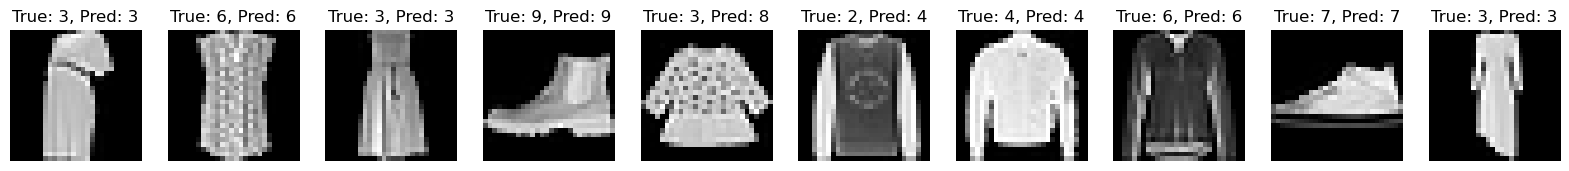

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
Результаты для Model 2


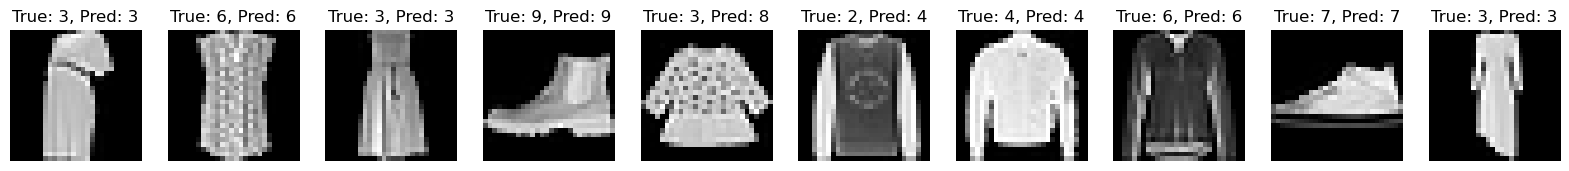

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step
Результаты для Model 3


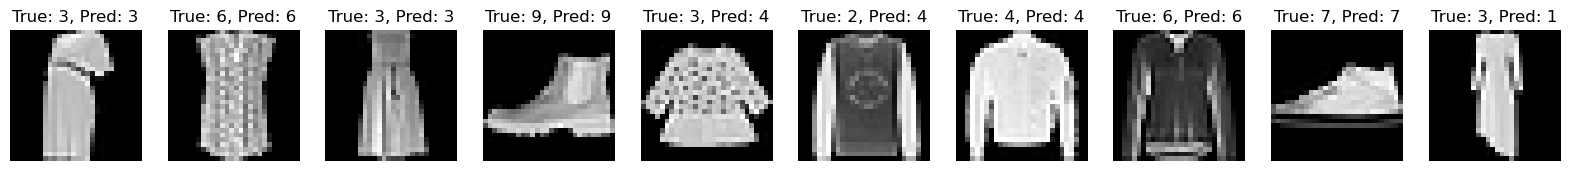

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step
Результаты для Model 4


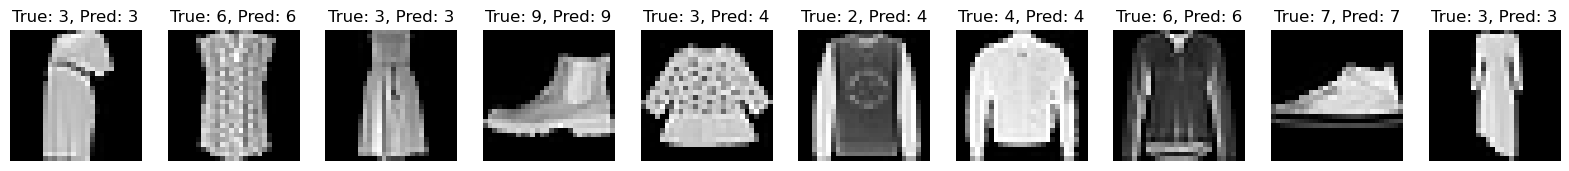

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
Результаты для Model 5


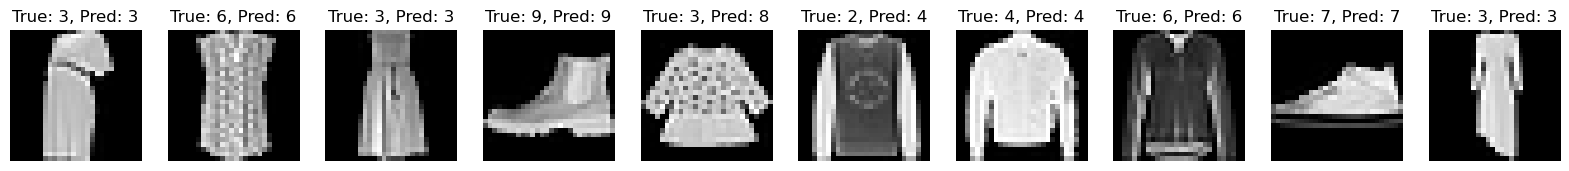

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
Результаты для Model 6


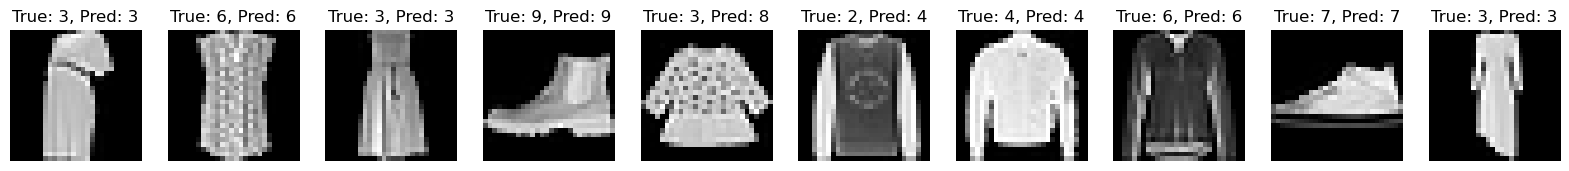

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step
Результаты для Model 7


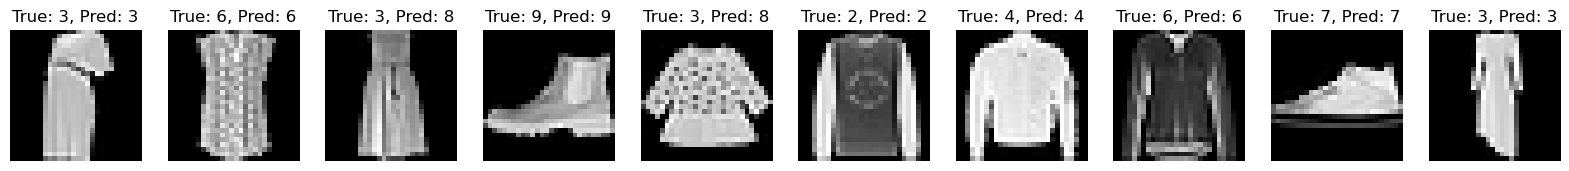

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
Результаты для Model 8


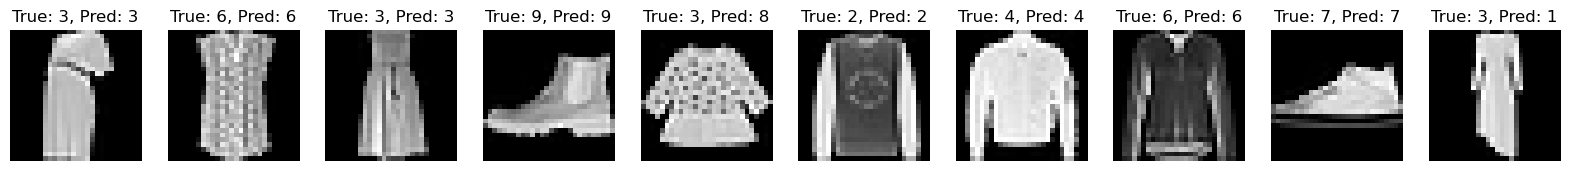

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step
Результаты для Model 9


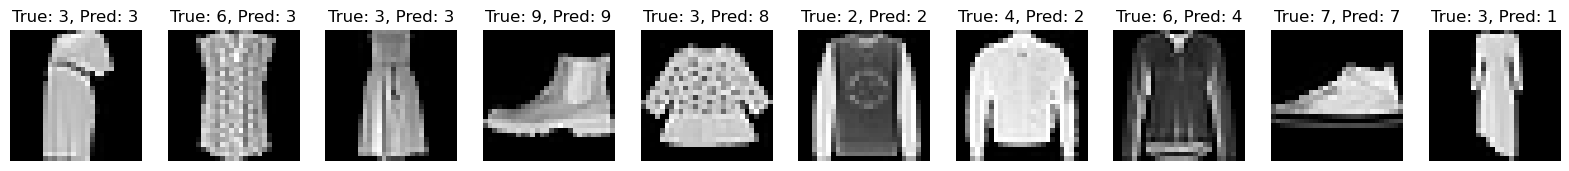

In [15]:
def plot_predictions(models, x_test, y_test, num_images=10):

    rand_pics = list(random.randint(0,10000,num_images))
    for i, model in enumerate(models):
        predictions = model.predict(x_test)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(y_test, axis=1)
        print(f'Результаты для Model {i+1}')
        x_test_reshaped = x_test.reshape(-1, 28, 28)
        
        fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
        for (num, j) in zip(range(num_images), rand_pics):
            ax = axes[num]
            ax.imshow(x_test_reshaped[j], cmap='gray')
            true_label = true_classes[j]
            predicted_label = predicted_classes[j]
            ax.set_title(f'True: {true_label}, Pred: {predicted_label}')
            ax.axis('off')
        plt.show()

plot_predictions(models, x_test, y_test, num_images=10)

### Примеры некорректных предсказаний

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step
Результаты для Model 1


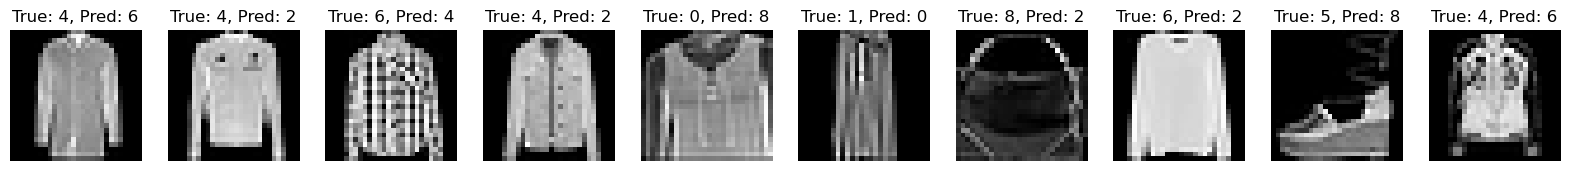

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step
Результаты для Model 2


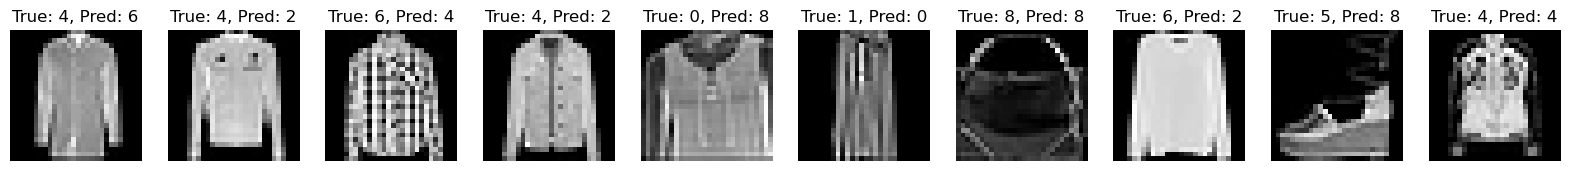

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
Результаты для Model 3


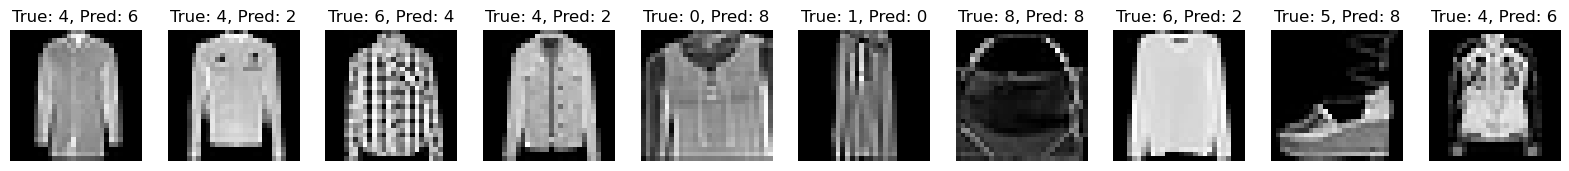

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step
Результаты для Model 4


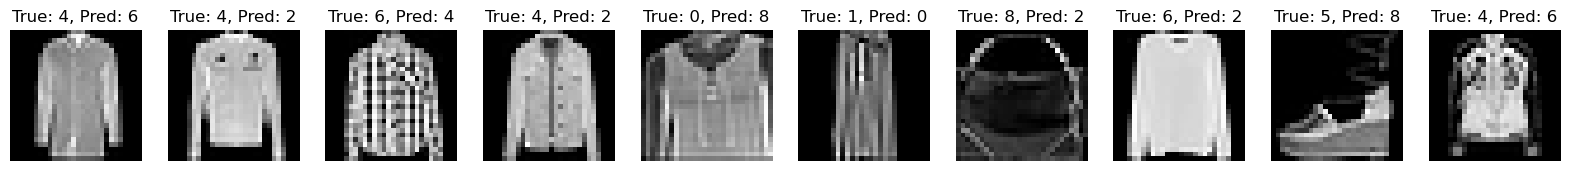

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
Результаты для Model 5


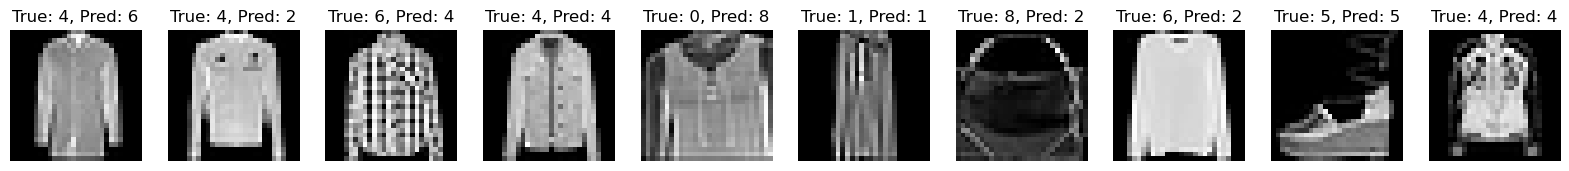

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step
Результаты для Model 6


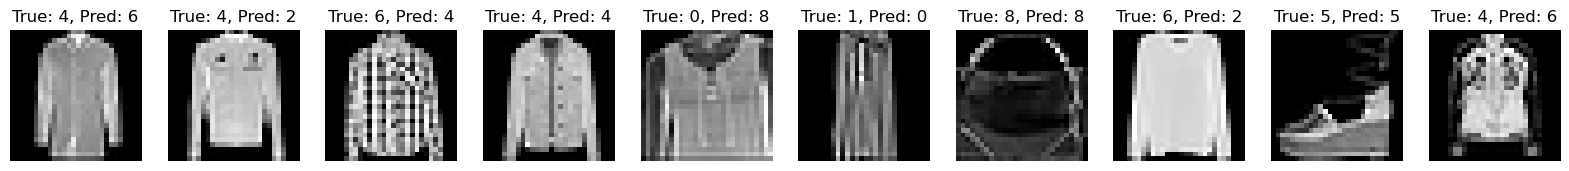

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step
Результаты для Model 7


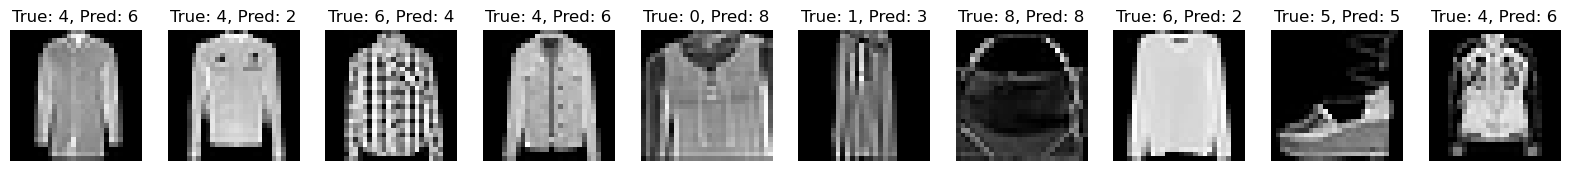

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
Результаты для Model 8


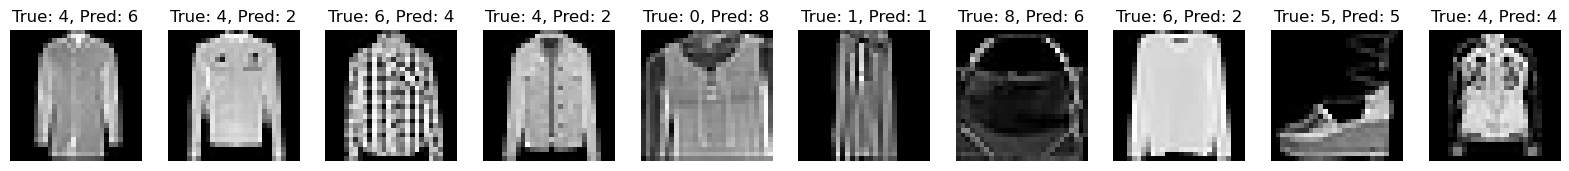

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
Результаты для Model 9


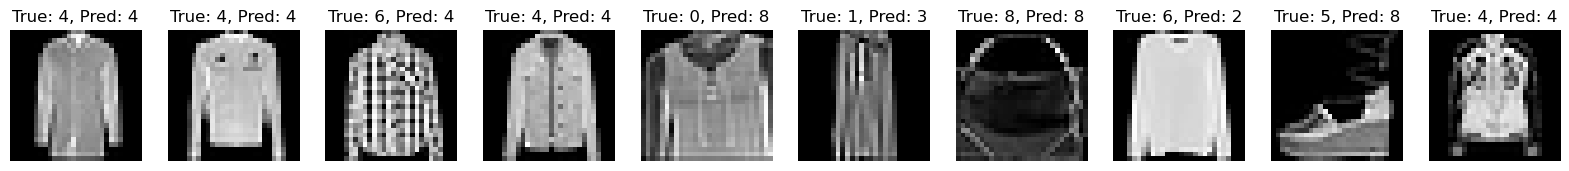

In [16]:
def plot_incorrect_predictions(models, x_test, y_test, num_images=10):
    
    x_test_flat = x_test.reshape(10000, 784)
    predictions_first_model = models[0].predict(x_test)
    predicted_classes_first_model = np.argmax(predictions_first_model, axis=1)
    true_classes = np.argmax(y_test, axis=1)
    incorrect_indices_first_model = np.where(predicted_classes_first_model != true_classes)[0]
    rand_pics = list(random.randint(0,len(incorrect_indices_first_model),num_images))
    
    for i, model in enumerate(models):
        predictions = model.predict(x_test)
        predicted_classes = np.argmax(predictions, axis=1)
        print(f'Результаты для Model {i+1}')
        x_test_reshaped = x_test.reshape(-1, 28, 28)

        fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
        for (num, j) in zip(range(num_images), rand_pics):
            idx = incorrect_indices_first_model[j] 
            ax = axes[num]
            ax.imshow(x_test_reshaped[idx], cmap='gray')
            true_label = true_classes[idx]
            predicted_label = predicted_classes[idx]
            ax.set_title(f'True: {true_label}, Pred: {predicted_label}')
            ax.axis('off')
        plt.show()

plot_incorrect_predictions(models, x_test, y_test, num_images=10)

## Сравнительная таблица

In [17]:
results = []
model_names = {'1': 'Полносвязная сеть (relu)',
               '2': 'Полносвязная сеть (tanh)',
               '3': 'Полносвязная сеть (sigmoid)',
               '4': 'Полносвязная сеть с меньшим количеством нейронов (relu)',
               '5': 'Глубокая сеть',
               '6': 'Cеть с Dropout',
               '7': 'Cеть с BatchNormalization',
               '8': 'Сеть с дополнительным Dropout и BatchNormalization',
               '9': 'Полносвязная cеть (relu) с другим оптимизатором (Adadelta)'}

for i, model in enumerate(models):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    val_acc = histories[i].history['val_accuracy'][-1]
    results.append({
        'Model': f'Model {i+1}',
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc,
        'Model description': model_names[f'{i+1}']
    })

results_df = pd.DataFrame(results)

In [18]:
# Сортируем по Validation Accuracy
results_df.sort_values('Validation Accuracy', ascending=False)

,Model,Validation Accuracy,Test Accuracy,Model description
4,Model 5,0.8903,0.8839,Глубокая сеть
5,Model 6,0.8834,0.8772,Cеть с Dropout
2,Model 3,0.8818,0.8732,Полносвязная сеть (sigmoid)
0,Model 1,0.8805,0.8749,Полносвязная сеть (relu)
1,Model 2,0.8796,0.8754,Полносвязная сеть (tanh)
7,Model 8,0.8768,0.8732,Сеть с дополнительным Dropout и BatchNormaliza...
3,Model 4,0.8749,0.8707,Полносвязная сеть с меньшим количеством нейрон...
6,Model 7,0.8736,0.8681,Cеть с BatchNormalization
8,Model 9,0.6730,0.6712,Полносвязная cеть (relu) с другим оптимизаторо...


In [19]:
# Сортируем по Test Accuracy
results_df.sort_values('Test Accuracy', ascending=False)

,Model,Validation Accuracy,Test Accuracy,Model description
4,Model 5,0.8903,0.8839,Глубокая сеть
5,Model 6,0.8834,0.8772,Cеть с Dropout
1,Model 2,0.8796,0.8754,Полносвязная сеть (tanh)
0,Model 1,0.8805,0.8749,Полносвязная сеть (relu)
2,Model 3,0.8818,0.8732,Полносвязная сеть (sigmoid)
7,Model 8,0.8768,0.8732,Сеть с дополнительным Dropout и BatchNormaliza...
3,Model 4,0.8749,0.8707,Полносвязная сеть с меньшим количеством нейрон...
6,Model 7,0.8736,0.8681,Cеть с BatchNormalization
8,Model 9,0.6730,0.6712,Полносвязная cеть (relu) с другим оптимизаторо...


## Количество правильных/неправильных предсказаний 

In [20]:
def number_of_correct_and_wrong_preds(model, x_test, y_test):
    
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    correct, incorrect = 0, 0
    for i in range(10):
        correct_predictions = conf_matrix[i, i]
        incorrect_predictions = sum(conf_matrix[i, :]) - correct_predictions
        correct += correct_predictions
        incorrect += incorrect_predictions
        
    return correct, incorrect

In [21]:
corrects = []
incorrects = []
for model in models:
    corrects.append(number_of_correct_and_wrong_preds(model, x_test, y_test)[0])
    incorrects.append(number_of_correct_and_wrong_preds(model, x_test, y_test)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


In [22]:
table = {'Model': [i for i in range(1,10)]}
table['correct'] = []
table['incorrect'] = []
for i in range(0,9):
    table['correct'].append(corrects[i])
    table['incorrect'].append(incorrects[i])
table = pd.DataFrame(table)
table = table.set_index('Model')
table.sort_values('correct', ascending=False)

,correct,incorrect
Model,,
5,8839,1161
6,8772,1228
2,8754,1246
1,8749,1251
3,8732,1268
8,8732,1268
4,8707,1293
7,8681,1319
9,6712,3288


## Количество правильных/неправильных предсказаний в каждом классе

In [23]:
def number_of_correct_and_wrong_preds_in_every_class(model, x_test, y_test):
    
    correct = {'Class 1': 0,'Class 2': 0,'Class 3': 0,'Class 4': 0,'Class 5': 0,
               'Class 6': 0,'Class 7': 0,'Class 8': 0,'Class 9': 0,'Class 10': 0}
    incorrect = {'Class 1': 0,'Class 2': 0,'Class 3': 0,'Class 4': 0,'Class 5': 0,
                 'Class 6': 0,'Class 7': 0,'Class 8': 0,'Class 9': 0,'Class 10': 0}
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    for i in range(10):
        correct_predictions = conf_matrix[i, i]
        incorrect_predictions = sum(conf_matrix[i, :]) - correct_predictions
        correct[f'Class {i+1}'] = correct_predictions
        incorrect[f'Class {i+1}'] = incorrect_predictions
        
    return correct, incorrect

In [24]:
corrects = []
incorrects = []
for model in models:
    corrects.append(number_of_correct_and_wrong_preds_in_every_class(model, x_test, y_test)[0])
    incorrects.append(number_of_correct_and_wrong_preds_in_every_class(model, x_test, y_test)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step


In [25]:
table = {'Class': [i for i in range(1,11)]}
for i in range(0,9):
    table[f'model_{i+1}_correct'] = list(corrects[i].values())
    table[f'model_{i+1}_incorrect'] = list(incorrects[i].values())
table = pd.DataFrame(table)
table = table.set_index('Class')
table.columns = pd.MultiIndex.from_tuples([item for sublist in [[(f'model_{i+1}', 'correct'), (f'model_{i+1}', 'incorrect')] for i in range(9)] for item in sublist])
table

model_1           model_2           model_3           model_4            \
      correct incorrect correct incorrect correct incorrect correct incorrect   
Class                                                                           
1         843       157     911        89     809       191     858       142   
2         955        45     959        41     968        32     961        39   
3         758       242     849       151     778       222     762       238   
4         931        69     864       136     898       102     837       163   
5         740       260     814       186     784       216     783       217   
6         955        45     927        73     944        56     942        58   
7         694       306     535       465     695       305     706       294   
8         962        38     980        20     940        60     943        57   
9         958        42     974        26     969        31     956        44   
10        953        47     941        59     947        53     959        41   

      model_5           model_6           model_7           model_8            \
      correct incorrect correct incorrect correct incorrect correct incorrect   
Class                                                                           
1         848       152     856       144     846       154     803       197   
2         981        19     966        34     967        33     975        25   
3         724       276     777       223     785       215     858       142   
4         918        82     893       107     893       107     893       107   
5         849       151     846       154     725       275     776       224   
6         971        29     961        39     952        48     971        29   
7         662       338     594       406     620       380     599       401   
8         957        43     952        48     979        21     950        50   
9         974        26     976        24     987        13     974        26   
10        955        45     951        49     927        73     933        67   

      model_9            
      correct incorrect  
Class                    
1         804       196  
2         894       106  
3         583       417  
4         787       213  
5         671       329  
6         115       885  
7         146       854  
8         898       102  
9         888       112  
10        926        74

# Задание 3

Используя базу "Пассажиры автобуса", подготовьте данные для обучения нейронной сети, классифицирующей изображение на два класса:
- входящий пассажир
- выходящий пассажир

Добейтесь точности работы модели на проверочной выборке не ниже 85%

Ссылка на датасет: https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip

Информацию о загрузке изображений и преобразовании их в numnpy-массивы вы можете найти в Базе знаний:


## Подготовка данных

In [26]:
def load_images_from_folder(folder, label, target_size=(150, 150)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            # Открытие и изменение размера изображения
            img = Image.open(img_path).resize(target_size)
            img_array = np.array(img)
            
            # Убеждаемся, что изображения трехканальные (RGB)
            if img_array.shape == (150, 150):  # Если ч/б изображения
                img_array = np.stack((img_array,) * 3, axis=-1)
            elif img_array.shape[2] == 4:  # Если RGBA, удалить альфа-канал
                img_array = img_array[..., :3]

            images.append(img_array)
            labels.append(label)
            
        # Ошибка загрузки изображения
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    
    return np.array(images), np.array(labels)

In [36]:
incoming = 'bus/Входящий'
outgoing = 'bus/Выходящий'
incoming_images, incoming_labels = load_images_from_folder(incoming, 0)
outgoing_images, outgoing_labels = load_images_from_folder(outgoing, 1)
x = np.concatenate((incoming_images, outgoing_images), axis=0)
y = np.concatenate((incoming_labels, outgoing_labels), axis=0)
x, y = shuffle(x, y, random_state=42) # перемешиваем датасет
x = x / 255.0
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Error loading image .DS_Store: cannot identify image file 'bus/Входящий/.DS_Store'
Error loading image .ipynb_checkpoints: [Errno 21] Is a directory: 'bus/Входящий/.ipynb_checkpoints'


In [37]:
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (6355, 150, 150, 3), Validation set: (1362, 150, 150, 3), Test set: (1362, 150, 150, 3)


## Нейронная сеть

In [38]:
model = Sequential([Flatten(input_shape=(150, 150, 3)),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dense(64, activation='relu'),
                    BatchNormalization(),
                    Dense(1, activation='sigmoid')])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/Users/iveeliz/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
print(model.summary())

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │     8,640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,649,217 (32.99 MB)

 Trainable params: 8,648,833 (32.99 MB)

 Non-trainable params: 384 (1.50 KB)

None


## Обучение модели

In [40]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6918 - loss: 0.6373 - val_accuracy: 0.7658 - val_loss: 0.5230
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8411 - loss: 0.3639 - val_accuracy: 0.8157 - val_loss: 0.4145
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8875 - loss: 0.2760 - val_accuracy: 0.8062 - val_loss: 0.3884
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9109 - loss: 0.2252 - val_accuracy: 0.8025 - val_loss: 0.3936
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9266 - loss: 0.1921 - val_accuracy: 0.6013 - val_loss: 1.1256
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9372 - loss: 0.1691 - val_accuracy: 0.8436 - val_loss: 0.3491
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9465 - loss: 0.1438 - val_accuracy: 0.8465 - val_loss: 0.3709
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9480 - loss: 0.1437 - val_accu

In [44]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {round(test_accuracy*100, 2)} %")

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9443 - loss: 0.1599
Test Accuracy: 94.93 %


## Визуализация результатов

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


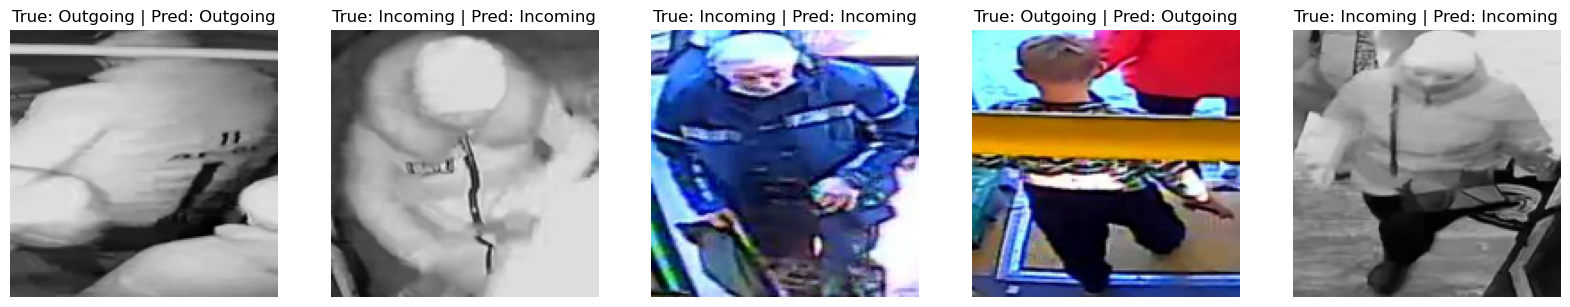

In [45]:
def plot_predictions(models, x_test, y_test, num_images=5):

    rand_pics = list(random.randint(0,10000,num_images))
    predictions = model.predict(x_test)
    predicted_classes = (predictions > 0.5).astype('int32')
    rand_pics = np.random.choice(range(len(X_test)), num_images, replace=False)
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for (num, i) in zip(range(num_images), rand_pics):
        ax = axes[num]
        ax.imshow(x_test[i]) 
        ax.set_title(f"True: {'Incoming' if y_test[i] == 0 else 'Outgoing'} | Pred: {'Incoming' if predicted_classes[i] == 0 else 'Outgoing'}")
        ax.axis('off')
    plt.show()

plot_predictions(models, X_test, y_test, num_images=5)

## Количество правильных/неправильных предсказаний

In [46]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype('int32')
conf_matrix = confusion_matrix(y_pred, y_test)
correct_predictions = conf_matrix[0, 0] + conf_matrix[1, 1]
incorrect_predictions = conf_matrix[0, 1] + conf_matrix[1, 0]
print("Correct predictions:", correct_predictions)
print("Inorrect predictions:", incorrect_predictions)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Correct predictions: 1293
Inorrect predictions: 69
